# Sample the grouprate function

Plot the group rate function and its iterations. Sizes are assumed to be an alternating sequence of odd and even values.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sociophysics.experiment
import sociophysics.voting
from IPython.display import set_matplotlib_formats

Parameters

In [3]:
outdir = "out/"
plotdir = "plot/"

## Experiment

Parameters

In [4]:
sizes = np.array([2, 3, 8, 9, 64, 65, 1024, 1025])
iterations = 1
rates = np.linspace(0, 1, 201)
path = outdir + "voting-grouprate_sample.csv"

Run

In [5]:
model = sociophysics.voting.sample_grouprate
experiment = sociophysics.experiment.Experiment(model)
experiment.run(sizes, iterations, rates)
experiment.to_file(path)

## Analysis

Parameters

In [6]:
iteration = 1
pathin = outdir + "voting-grouprate_sample.csv"
pathout = plotdir + "voting-grouprate_plot.pdf"

Data

In [7]:
df = pd.read_csv(
    pathin, comment="#", index_col=['size', 'iteration', 'rate']
).sort_index().xs(
    iteration, level='iteration'
)

sizes, rates = df.index.levels

Style

In [8]:
plt.style.use(['seaborn-paper', plotdir + ".mplstyle"])
set_matplotlib_formats('pdf', 'svg')
width = 8.3*0.7

Plot

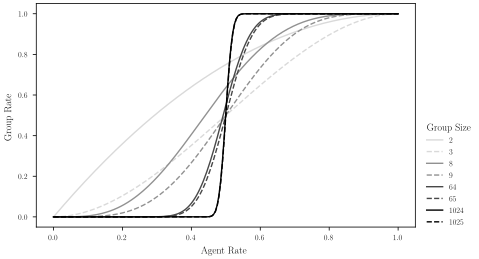

In [9]:
fig, ax = plt.subplots(figsize=(width, width/1.618))

colors = mpl.cm.get_cmap('binary')(
    np.linspace(.15, 1, (sizes.size+1)//2)
)
linestyles = ['-', '--']

for i, size in enumerate(sizes):
    ax.plot(
        df['grouprate'].xs(size, level='size'),
        label="{:0d}".format(size),
        color=colors[i // 2],
        linestyle=linestyles[size % 2]
    )

ax.set_xlabel("Agent Rate")
ax.set_ylabel("Group Rate")

legend = fig.legend(
    title="Group Size",
    loc='lower left',
    bbox_to_anchor=(1.02, ax.get_position().y0)
)
legend._legend_box.align = 'left'

fig.savefig(pathout, bbox_extra_artists=(legend,))